In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
image_path = 'NamaDiri.jpg'  
save_outputs = True

In [3]:
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Gambar '{image_path}' tidak ditemukan!")

In [4]:
image = cv2.imread(image_path)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
none_image = np.zeros_like(image)

In [5]:
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

lower_red1 = np.array([0, 150, 0])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 150, 0])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([40, 150, 0])
upper_green = np.array([70, 255, 255])

In [6]:
print("Threshold Biru:", lower_blue, "->", upper_blue)
print("Threshold Merah 1:", lower_red1, "->", upper_red1)
print("Threshold Merah 2:", lower_red2, "->", upper_red2)
print("Threshold Hijau:", lower_green, "->", upper_green)

Threshold Biru: [100 150   0] -> [140 255 255]
Threshold Merah 1: [  0 150   0] -> [ 10 255 255]
Threshold Merah 2: [160 150   0] -> [180 255 255]
Threshold Hijau: [ 40 150   0] -> [ 70 255 255]


In [7]:
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

In [8]:
mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_green)

In [9]:
blue = cv2.bitwise_and(image, image, mask=mask_blue)
red_blue = cv2.bitwise_and(image, image, mask=mask_red_blue)
rgb = cv2.bitwise_and(image, image, mask=mask_rgb)

In [10]:
none_rgb = cv2.cvtColor(none_image, cv2.COLOR_BGR2RGB)
blue_rgb = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
red_blue_rgb = cv2.cvtColor(red_blue, cv2.COLOR_BGR2RGB)
rgb_rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

In [11]:
def compute_histogram(mask):
    masked_img = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    hist_r = cv2.calcHist([masked_img], [0], mask, [256], [0, 256])
    hist_g = cv2.calcHist([masked_img], [1], mask, [256], [0, 256])
    hist_b = cv2.calcHist([masked_img], [2], mask, [256], [0, 256])
    return hist_r, hist_g, hist_b

In [12]:
hist_r_blue, hist_g_blue, hist_b_blue = compute_histogram(mask_blue)
hist_r_rb, hist_g_rb, hist_b_rb = compute_histogram(mask_red_blue)
hist_r_rgb, hist_g_rgb, hist_b_rgb = compute_histogram(mask_rgb)

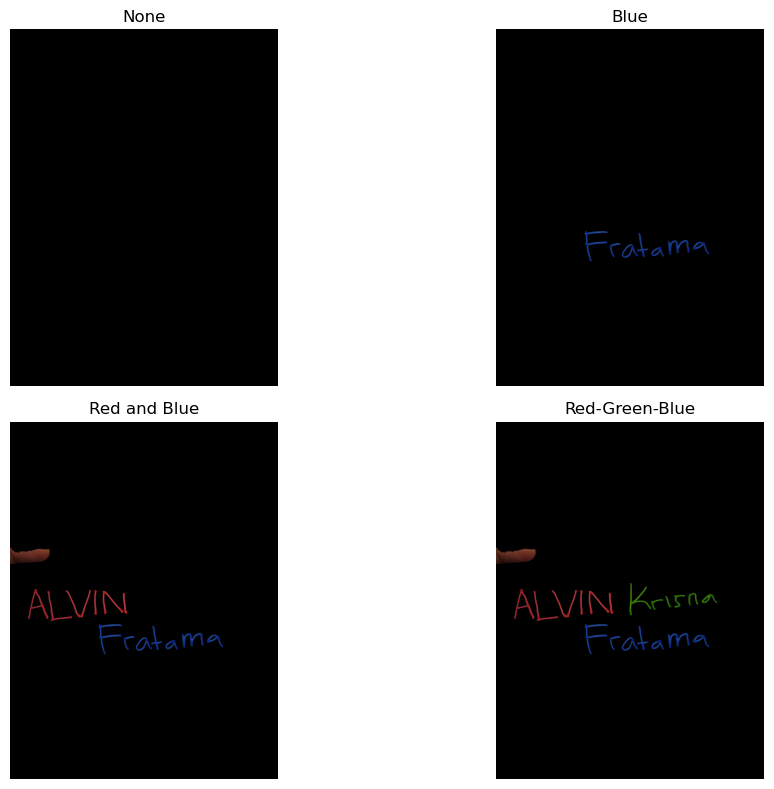

In [13]:
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 8))
axs1[0, 0].imshow(none_rgb)
axs1[0, 0].set_title('None'); axs1[0, 0].axis('off')

axs1[0, 1].imshow(blue_rgb)
axs1[0, 1].set_title('Blue'); axs1[0, 1].axis('off')

axs1[1, 0].imshow(red_blue_rgb)
axs1[1, 0].set_title('Red and Blue'); axs1[1, 0].axis('off')

axs1[1, 1].imshow(rgb_rgb)
axs1[1, 1].set_title('Red-Green-Blue'); axs1[1, 1].axis('off')

plt.tight_layout()
plt.show()

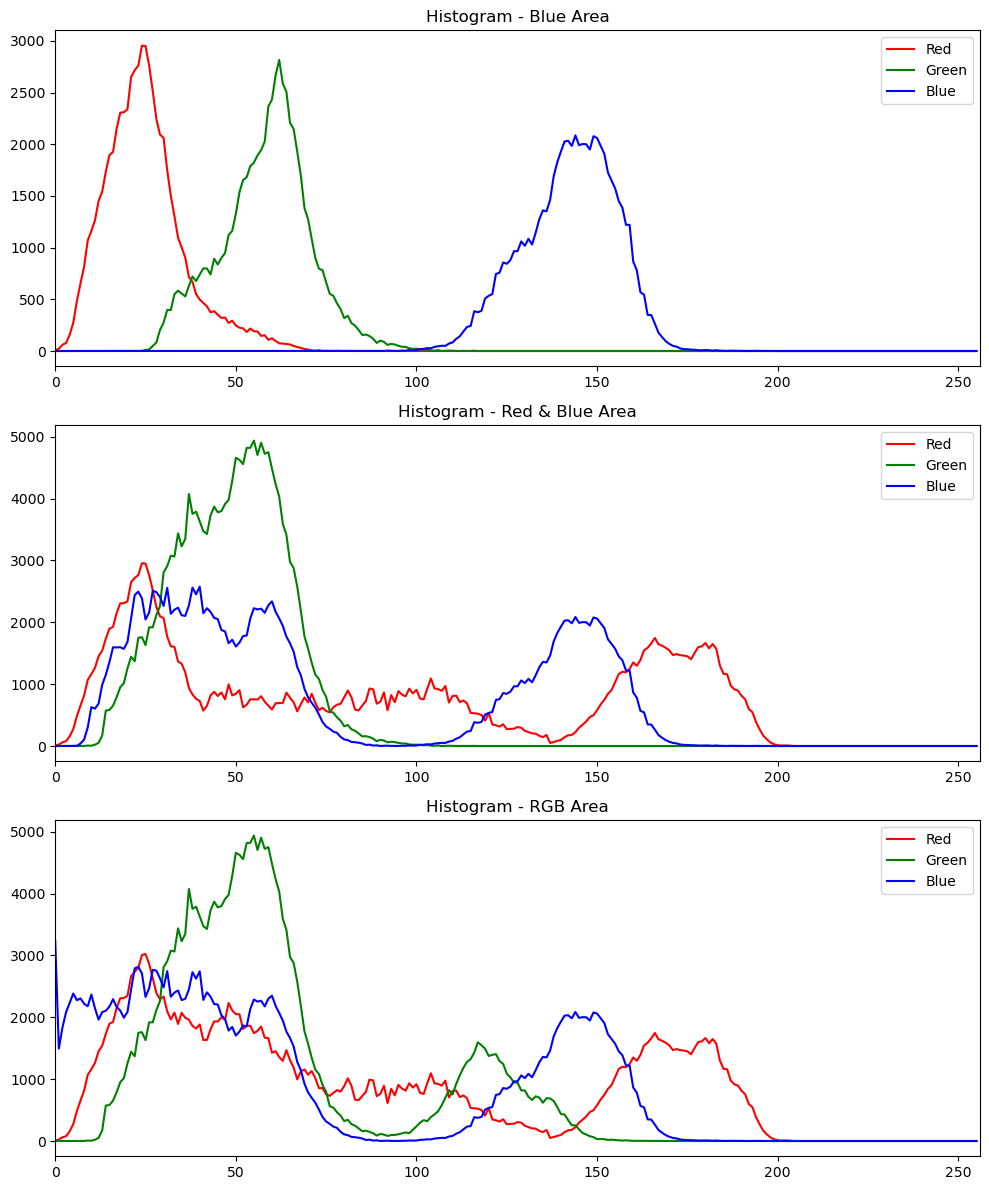

In [14]:
fig2, axs2 = plt.subplots(3, 1, figsize=(10, 12))

axs2[0].plot(hist_r_blue, color='red', label='Red')
axs2[0].plot(hist_g_blue, color='green', label='Green')
axs2[0].plot(hist_b_blue, color='blue', label='Blue')
axs2[0].set_title('Histogram - Blue Area')
axs2[0].set_xlim([0, 256]); axs2[0].legend()

axs2[1].plot(hist_r_rb, color='red', label='Red')
axs2[1].plot(hist_g_rb, color='green', label='Green')
axs2[1].plot(hist_b_rb, color='blue', label='Blue')
axs2[1].set_title('Histogram - Red & Blue Area')
axs2[1].set_xlim([0, 256]); axs2[1].legend()

axs2[2].plot(hist_r_rgb, color='red', label='Red')
axs2[2].plot(hist_g_rgb, color='green', label='Green')
axs2[2].plot(hist_b_rgb, color='blue', label='Blue')
axs2[2].set_title('Histogram - RGB Area')
axs2[2].set_xlim([0, 256]); axs2[2].legend()

plt.tight_layout()
plt.show()

In [24]:
def cari_threshold_dari_mask(hsv_img, mask, warna):
    hue_values = hsv_img[:, :, 0][mask > 0]
    if len(hue_values) == 0:
        return warna, (0, 0)
    low = int(np.min(hue_values))
    high = int(np.max(hue_values))
    return warna, (low, high)

In [25]:
thresholds = []
thresholds.append(cari_threshold_dari_mask(hsv, mask_red, "merah"))
thresholds.append(cari_threshold_dari_mask(hsv, mask_green, "hijau"))
thresholds.append(cari_threshold_dari_mask(hsv, mask_blue, "biru"))

thresholds.sort(key=lambda x: x[1][0])

print("AMBANG BATAS WARNA (dalam Hue HSV):")
for warna, (low, high) in thresholds:
    print(f"{warna.upper():<6}: LOW = {low}, HIGH = {high}")


AMBANG BATAS WARNA (dalam Hue HSV):
MERAH : LOW = 0, HIGH = 179
HIJAU : LOW = 44, HIGH = 57
BIRU  : LOW = 108, HIGH = 118


In [28]:
for label, mask in zip(['Merah', 'Hijau', 'Biru'], [mask_red, mask_green, mask_blue]):
    hue_values = hsv[:, :, 0][mask > 0]
    if len(hue_values) > 0:
        avg = np.mean(hue_values)
        print(f"Rata-rata hue untuk {label}: {avg:.2f}")
    else:
        print(f"Tidak ditemukan area warna {label}")


Rata-rata hue untuk Merah: 84.78
Rata-rata hue untuk Hijau: 49.34
Rata-rata hue untuk Biru: 111.55
